In [19]:
!pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable


In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
import numpy as np
import pandas as pd
from surprise import SVD
from surprise import KNNBasic
import matplotlib.pyplot as plt
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

**a. Read data from “ratings small.csv” with line format: 'userID movieID rating timestamp'**

In [22]:
df = pd.read_csv("ratings_small.csv")
dataset = Dataset.load_from_df(df[["userId", "movieId", "rating"]], Reader())

**c. Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation**

In [23]:
# According to the docs, SVD becomes Probabilistic Matrix Factorization when biased is set to false
probabilistic_matrix_factorization_results = cross_validate(SVD(biased=False) , dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7773  0.7826  0.7803  0.7805  0.7729  0.7787  0.0034  
RMSE (testset)    1.0098  1.0154  1.0063  1.0138  1.0029  1.0097  0.0046  
Fit time          0.76    0.76    0.78    0.83    0.76    0.78    0.03    
Test time         0.07    0.08    0.20    0.08    0.08    0.10    0.05    


In [24]:
user_based_collaborative_filtering_results = cross_validate(KNNBasic(sim_options={"user_based": True}), dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7460  0.7464  0.7401  0.7468  0.7429  0.7444  0.0026  
RMSE (testset)    0.9685  0.9733  0.9641  0.9714  0.9636  0.9682  0.0039  
Fit time          0.15    0.15    0.16    0.16    0.16    0.16    0.00    
Test time         0.78    0.81    0.91    0.82    0.77    0.82    0.05    


In [25]:
item_based_collaborative_filtering_results = cross_validate(KNNBasic(sim_options={"user_based": False}), dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7236  0.7211  0.7210  0.7238  0.7149  0.7209  0.0032  
RMSE (testset)    0.9380  0.9341  0.9342  0.9383  0.9281  0.9345  0.0037  
Fit time          2.78    2.90    3.00    2.80    2.84    2.86    0.08    
Test time         3.92    3.96    4.09    4.29    4.01    4.05    0.13    


**d. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data?**

[[1.0096608  0.77871874]
 [0.96816302 0.74444342]
 [0.93452477 0.72086818]]


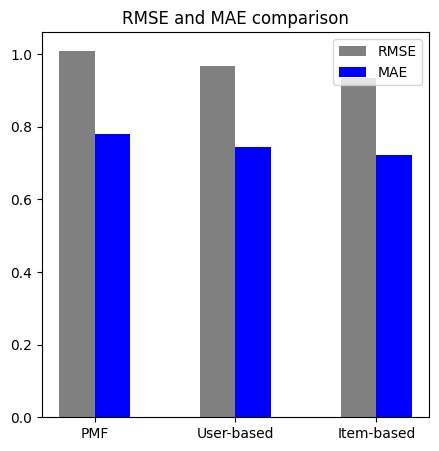

In [32]:
plot_data = np.array([[np.mean(probabilistic_matrix_factorization_results["test_rmse"]), np.mean(probabilistic_matrix_factorization_results["test_mae"])],
        [np.mean(user_based_collaborative_filtering_results["test_rmse"]), np.mean(user_based_collaborative_filtering_results["test_mae"])],
        [np.mean(item_based_collaborative_filtering_results["test_rmse"]), np.mean(item_based_collaborative_filtering_results["test_mae"])]])

print(plot_data)

width = 0.25
labels = ["PMF", "User-based", "Item-based"]

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(5, 5))

bar1 = axes.bar(np.arange(len(labels)), plot_data[:, 0], width, label="RMSE", color = "gray")
bar2 = axes.bar(np.arange(len(labels)) + width, plot_data[:, 1], width, label="MAE", color = "blue")

axes.set_title("RMSE and MAE comparison")
axes.set_xticks(np.arange(len(labels)) + width / 2)
axes.set_xticklabels(labels)
axes.legend()

plt.show()

**e. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?**

In [33]:
similarities = ["cosine", "MSD", "Pearson"]

ubcf_algos = [
    KNNBasic(sim_options={"name": "cosine", "user_based": True}),
    KNNBasic(sim_options={"name": "MSD", "user_based": True}),
    KNNBasic(sim_options={"name": "pearson", "user_based": True})
]

ibcf_algos = [
    KNNBasic(sim_options={"name": "cosine", "user_based": False}),
    KNNBasic(sim_options={"name": "MSD", "user_based": False}),
    KNNBasic(sim_options={"name": "pearson", "user_based": False})
]

In [34]:
ubcf_plot_data = []
# user based collaborative filtering
for i in range(3):
  print("Similarity being used:", similarities[i])
  result = cross_validate(ubcf_algos[i], dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)
  print()

  ubcf_plot_data.append([np.mean(result["test_rmse"]), np.mean(result["test_mae"])])

ubcf_plot_data = np.array(ubcf_plot_data)

Similarity being used: cosine
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7693  0.7745  0.7682  0.7660  0.7604  0.7677  0.0046  
RMSE (testset)    0.9955  0.9998  0.9933  0.9917  0.9876  0.9936  0.0040  
Fit time          0.43    0.38    0.38    0.37    0.37    0.39    0.02    
Test time         0.93    0.80    0.88    0.82    0.87    0.86    0.05    

Similarity being used: MSD
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [36]:
ibcf_plot_data = []

# item based collaborative filtering
for i in range(3):
  print("Similarity being used:", similarities[i])
  result = cross_validate(ibcf_algos[i], dataset, measures=["MAE", "RMSE"], cv=5, verbose=True)
  print()

  ibcf_plot_data.append([np.mean(result["test_rmse"]), np.mean(result["test_mae"])])

ibcf_plot_data = np.array(ibcf_plot_data)

Similarity being used: cosine
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7731  0.7737  0.7736  0.7791  0.7745  0.7748  0.0022  
RMSE (testset)    0.9967  0.9946  0.9927  0.9979  0.9937  0.9951  0.0019  
Fit time          5.80    5.44    5.80    5.56    5.60    5.64    0.14    
Test time         4.19    3.92    4.45    4.10    3.99    4.13    0.18    

Similarity being used: MSD
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [41]:
print(ubcf_plot_data)
print(ibcf_plot_data)

[[0.99357315 0.76769148]
 [0.96693845 0.74308993]
 [0.99844811 0.77255274]]
[[0.9951308  0.77478805]
 [0.93430655 0.72061414]
 [0.98851845 0.76690203]]


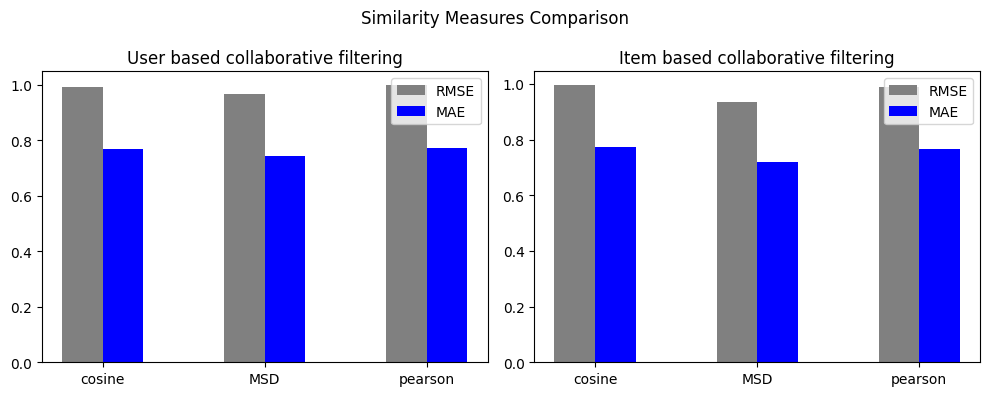

In [39]:
width = 0.25
labels = ["cosine", "MSD", "pearson"]

fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
fig.suptitle("Similarity Measures Comparison")

# first fig
bar1 = axes1.bar(np.arange(len(labels)),
                 ubcf_plot_data[:, 0], width, label="RMSE", color="gray")
bar2 = axes1.bar(np.arange(len(labels)) + width, ubcf_plot_data[:, 1], width, label="MAE", color = "blue")

axes1.set_title("User based collaborative filtering")
axes1.set_xticks(np.arange(len(labels)) + width / 2)
axes1.set_xticklabels(labels)
axes1.legend()

# second fig
bar3 = axes2.bar(np.arange(len(labels)), ibcf_plot_data[:, 0], width, label="RMSE", color = "gray")
bar4 = axes2.bar(np.arange(len(labels)) + width, ibcf_plot_data[:, 1], width, label="MAE", color = "blue")

axes2.set_title("Item based collaborative filtering")
axes2.set_xticks(np.arange(len(labels)) + width / 2)
axes2.set_xticklabels(labels)
axes2.legend()

plt.tight_layout()
plt.show()

**f. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results.**

In [40]:
ubcf_results_with_different_k = []

for i in range(5, 101, 5):
    result = cross_validate(KNNBasic(k=i, sim_options={"user_based": True}), dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)
    ubcf_results_with_different_k.append([np.mean(result["test_rmse"]), np.mean(result["test_mae"])])

ibcf_results_with_different_k = []

for i in range(5, 101, 5):
    result = cross_validate(KNNBasic(k=i, sim_options={"user_based": False}), dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)
    ibcf_results_with_different_k.append([np.mean(result["test_rmse"]), np.mean(result["test_mae"])])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9874  0.9726  0.9865  0.9928  0.9860  0.9851  0.0067  
MAE (testset)     0.7560  0.7470  0.7543  0.7578  0.7542  0.7538  0.0037  
Fit time          0.13    0.14    0.16    0.15    0.14    0.15    0.01    
Test time         0.59    0.63    0.72    0.60    0.70    0.65    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [43]:
ubcf_results_with_different_k = np.array(ubcf_results_with_different_k)
ibcf_results_with_different_k = np.array(ibcf_results_with_different_k)

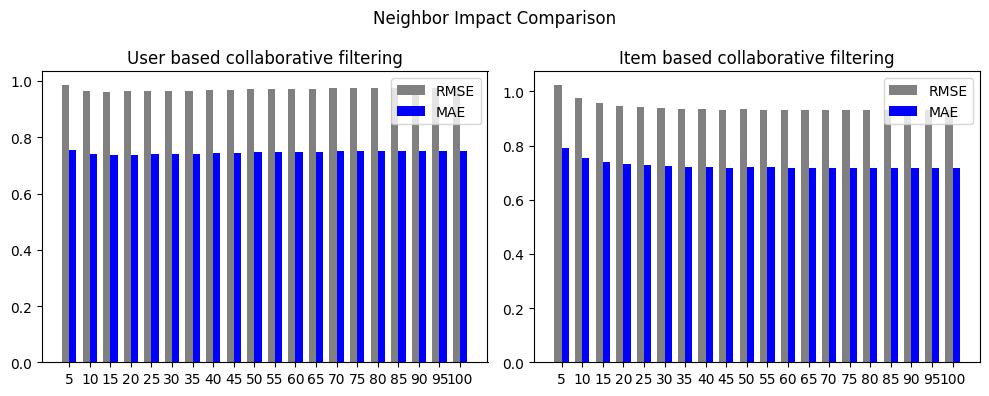

In [45]:
width = 0.35
labels = [i for i in range(5, 101, 5)]

fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
fig.suptitle("Neighbor Impact Comparison")

# first fig
bar1 = axes1.bar(np.arange(len(labels)), ubcf_results_with_different_k[:, 0], width, label="RMSE", color = "gray")
bar2 = axes1.bar(np.arange(len(labels)) + width, ubcf_results_with_different_k[:, 1], width, label="MAE", color = "blue")

axes1.set_title("User based collaborative filtering")
axes1.set_xticks(np.arange(len(labels)) + width / 2)
axes1.set_xticklabels(labels)
axes1.legend()

# second fig
bar3 = axes2.bar(np.arange(len(labels)), ibcf_results_with_different_k[:, 0], width, label="RMSE", color = "gray")
bar4 = axes2.bar(np.arange(len(labels)) + width, ibcf_results_with_different_k[:, 1], width, label="MAE", color = "blue")

axes2.set_title("Item based collaborative filtering")
axes2.set_xticks(np.arange(len(labels)) + width / 2)
axes2.set_xticklabels(labels)
axes2.legend()

plt.tight_layout()
plt.show()

**g. Identify the best number of neighbor (denoted by K) for User/Item based
collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?**

In [46]:
# finding out the best k
values_of_k = [i for i in range(5, 101, 5)]

ubcf_min_k = values_of_k[np.argmin(ubcf_results_with_different_k[:, 0])]
ibcf_min_k = values_of_k[np.argmin(ibcf_results_with_different_k[:, 0])]

print(ubcf_min_k, ibcf_min_k)

15 80
